# Proyek Analisis Data: Nama dataset
- Nama: Theofilus Arifin
- Email: theofilusarifin@gmail.com
- Id Dicoding: theofilusarifin

## Menentukan Pertanyaan Bisnis

- Berapa waktu rata-rata pengiriman di berbagai negara bagian customer?
- Seberapa sering pengiriman mengalami keterlambatan di berbagai negara bagian customer?

## Menyiapkan semua library yang dibuthkan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Data akan dikumpulkan dari file csv yang ada pada dataset E-commerce Public Dataset. 

#### Load Data

Pada proyek visualisasi kali ini data yang akan digunakan adalah data customer, order, order_item, dan order_payment

In [370]:
customer_df = pd.read_csv('./data/customers_dataset.csv')
order_df = pd.read_csv('./data/orders_dataset.csv')
order_item_df = pd.read_csv('./data/order_items_dataset.csv')

Sebelum melakukan penggabungan data dari dataset yang ada, pembacaan data akan dilakukan terlebih dahulu untuk mengetahui kolom dari tiap data

In [371]:
customer_df.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


In [372]:
order_df.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [373]:
order_item_df.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


Dari hasil pembacaaan data terdapat beberapa kolom yang dapat di drop karena tidak berhubungan dengan pertanyaan bisnis dan analisa lanjutan yang akan dilakukan

In [374]:
customer_df.drop(columns=['customer_zip_code_prefix', 'customer_city'], axis=1, inplace=True)

In [375]:
order_item_df.drop(columns=['seller_id', 'order_item_id', 'shipping_limit_date'], axis=1, inplace=True)

#### Join Data

Selanjutnya penggabungan data akan dilakukan, pertama data order dan customer akan di gabungkan menggunakan inner join

In [376]:
order_customer_df = pd.merge(
    left=order_df,
    right=customer_df,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)

Selanjutnya penggabungan data hasil join sebelumnya akan di gabungkan dengan data order_item menggunakan inner join

In [377]:
all_df = pd.merge(
    left=order_customer_df,
    right=order_item_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

Setelah data selesai digabungkan, perlu dilakukan suatu perlakuan khusus pada order_status yaitu kita perlu melakukan filtering hanya order_status yang delivered. Hal ini perlu dilakukan untuk menjawab pertanyaan bisnis mengenai waktu rata-rata pengiriman. Waktu rata-rata pengiriman hanya bisa dihitung apabila order_status adalah delivered

In [378]:
all_df['order_status'].value_counts()

order_status
delivered      110197
shipped          1185
canceled          542
invoiced          359
processing        357
unavailable         7
approved            3
Name: count, dtype: int64

In [379]:
all_df = all_df[all_df['order_status'] == 'delivered']

Karena semua data memiliki order status delivered, maka dari itu kolom order_status dapat di drop 

In [380]:
all_df.drop(columns='order_status', axis=1, inplace=True)

In [381]:
all_df.head(3)

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_state,product_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,SP,87285b34884572647811a353c7ac498a,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,BA,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,GO,aa4383b373c6aca5d8797843e5594415,159.90,19.22


### Assessing Data

#### Missing Value

Pada tahap assesing data, pertama pengecekan missing value akan dilakukan untuk mengetahui apakah terdapat data kosong

In [382]:
all_df.shape

(110197, 12)

In [383]:
all_df.isnull().sum()

order_id                          0
customer_id                       0
order_purchase_timestamp          0
order_approved_at                15
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
customer_unique_id                0
customer_state                    0
product_id                        0
price                             0
freight_value                     0
dtype: int64

Dapat dilihat bahwa terdapat beberapa data yang memiliki nilai kosong, karena data kosong sangat sedikit jika dibandingkan dengan keseluruhan data, perlakuan drop_na dapat dilakukan pada tahap cleaning

#### Duplicate Value

In [384]:
all_df.duplicated().sum()

10001

Dapat dilihat bahwa terdapat banyak data duplikat. Data duplikat ini dapat di drop pada tahap cleaning

#### Data Statistics 

In [385]:
all_df.describe(include='all')

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_state,product_id,price,freight_value
count,110197,110197,110197,110182,110195,110189,110197,110197,110197,110197,110197.000000,110197.000000
unique,96478,96478,95956,88274,80106,95658,445,93358,27,32216,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,2017-07-16 18:19:25,2018-02-24 03:20:27,2018-05-09 15:48:00,2017-07-31 18:03:02,2017-12-20 00:00:00,c8460e4251689ba205045f3ea17884a1,SP,aca2eb7d00ea1a7b8ebd4e68314663af,NaN,NaN
freq,21,21,21,23,48,21,596,24,46448,520,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.980563,19.948598
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.299446,15.698136
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.900000,16.260000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.170000,21.150000


Berdasarkan data statistics, terdapat biaya pengiriman yang sangat mahal yaitu 409.68 dolar. Harga ini bahkan melebihi 75% harga barang yaitu 134.17 dolar. Maka dari itu, biaya pengiriman ini merupakan suatu outlier yang perlu diselidiki apakah memang terjadi harga pengiriman yang mahal atau terjadi salah input/sistem 

#### Outlier Data

Proses selanjutnya yang dilakukan adalah melakukan pengecekan outlier. Pengecekan outlier akan dilakukan menggunakan boxplot. Pengecekan outlie hanya akan dilakukan pada kolom numeric yaituu price dan freight_price

In [386]:
nums = ['price', 'freight_value']

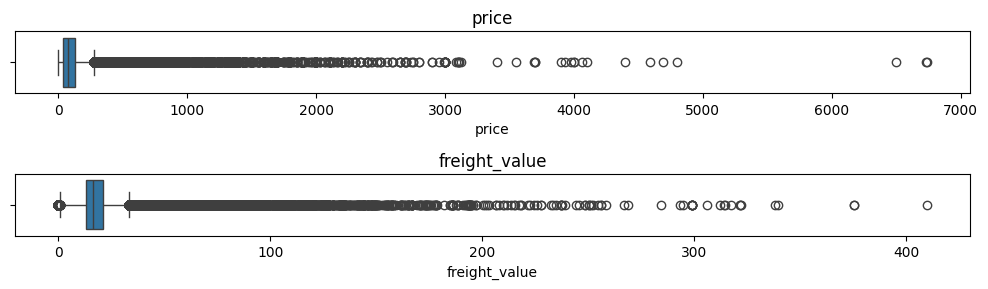

In [387]:
plt.figure(figsize=(10, 3))

for i in range(len(nums)):
    plt.subplot(2, 1, i+1)
    sns.boxplot(x=all_df[nums[i]], orient='h')
    plt.title(nums[i])

plt.tight_layout()
plt.show()

Dapat dilihat dari boxplot di atas, data memiliki cukup banyak outlier. Walaupun outlier dalam data cukup banyak hal ini tidak mengharuskan outlier untuk di hapus. Dalam konteks bisnis, mungkin saja terdapat suatu barang yang memiliki harga sangat mahal di atas batas 1.5 kali Q3. Hal yang sama berlaku juga untuk ongkos kirim suatu barang, mungkin saja terdapat barang yang memiliki ongkos kirim yang mahal. 

### Cleaning Data

#### Define

Pada tahap cleaning data akan dilakukan pembersihan data berdasarkan hasil dari assesing data yang telah dilakukan. Pembersihan data yang dilakukkan adalah:

1. Penghapusan Null Data
2. Penghapusan Data Duplicate
3. Pengubahan Tipe Data

#### Code

Pertama proses pengahapusan null data akan dilakukan menggunakan kode di bawah ini

In [388]:
all_df = all_df.dropna()

Selanjutnya proses penghapusan data duplicate akan dilakukan

In [389]:
all_df = all_df.drop_duplicates()

#### Test

In [390]:
all_df.isnull().sum()

order_id                         0
customer_id                      0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_state                   0
product_id                       0
price                            0
freight_value                    0
dtype: int64

Dapat dilihat data sudah bersih dari data kosong

In [391]:
all_df.duplicated().sum()

0

Dapat dilihat data sudah bersih dari data duplicate

In [392]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])
all_df['order_approved_at'] = pd.to_datetime(all_df['order_approved_at'])
all_df['order_delivered_carrier_date'] = pd.to_datetime(all_df['order_delivered_carrier_date'])
all_df['order_delivered_customer_date'] = pd.to_datetime(all_df['order_delivered_customer_date'])
all_df['order_estimated_delivery_date'] = pd.to_datetime(all_df['order_estimated_delivery_date'])

In [393]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100173 entries, 0 to 112649
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100173 non-null  object        
 1   customer_id                    100173 non-null  object        
 2   order_purchase_timestamp       100173 non-null  datetime64[ns]
 3   order_approved_at              100173 non-null  datetime64[ns]
 4   order_delivered_carrier_date   100173 non-null  datetime64[ns]
 5   order_delivered_customer_date  100173 non-null  datetime64[ns]
 6   order_estimated_delivery_date  100173 non-null  datetime64[ns]
 7   customer_unique_id             100173 non-null  object        
 8   customer_state                 100173 non-null  object        
 9   product_id                     100173 non-null  object        
 10  price                          100173 non-null  float64       
 11  freig

In [403]:
all_df.to_csv('./dashboard/main_data.csv', index=False)

## Exploratory Data Analysis (EDA)

#### RFM Analysis

RFM Analysis akan dilakukan dengan melakukan perhitungan pada masing-masing data order, selanjutnya akan dilakukan group by berdasarkan customer_unique_id

In [395]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])
current_date = all_df['order_purchase_timestamp'].max()

Perhitungan recency tiap order akan dilakukan dengan pengurangan waktu data ini diambil dengan waktu order 

In [396]:
all_df['recency'] = (current_date - all_df['order_purchase_timestamp']).dt.days

Selanjutnya dataframe rfm akan dibuat dengan melakukan grouping terhadap customer_unique_id

In [397]:
rfm_data = all_df.groupby('customer_unique_id').agg({
    'recency': 'min',
    'order_id': 'count',
    'price': 'sum'
}).reset_index()

In [398]:
rfm_data = rfm_data.rename(columns={
    'recency': 'recency',
    'order_id': 'frequency',
    'price': 'monetary'
})

In [399]:
rfm_data.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90
2,0000f46a3911fa3c0805444483337064,536,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,287,1,180.00


#### Distribusi Data

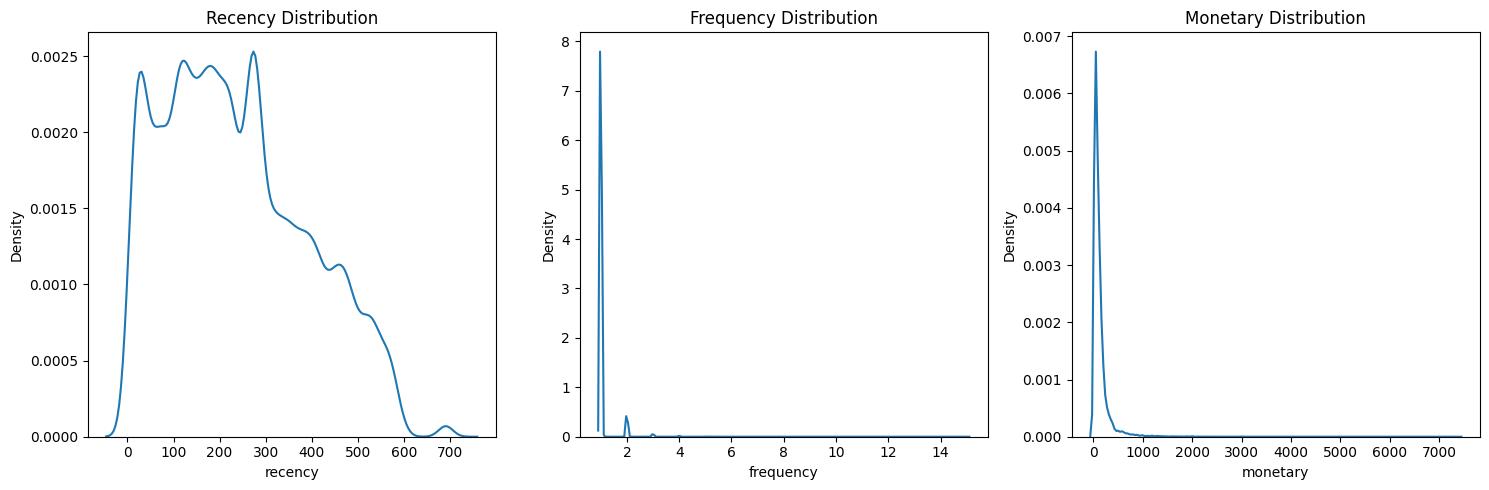

In [400]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.kdeplot(rfm_data['recency'])
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.kdeplot(rfm_data['frequency'])
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.kdeplot(rfm_data['monetary'])
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

Dari plot di atas dapat diketahui beberapa informasi sebagai berikut.

1. Recency

    - Terdapat cukup banyak customer yang belum melakukan order lagi, peserbaran paling tinggi berada pada 100-300 hari. Berarti dominan customer belum melakukan order lagi selama 3-10 bulan.
    - Perlu dilakukan perlakukan khusus terhadap customer yang memiliki recency di antara 3-10 bulan sebelum recency mereka bertambah jauh. Hal yang bisa dilakukan seperti pemberian diskon khusus dan lainnya

2. Frequency

    - Frequency dominan pada angka 1, berarti sangat sedikit customer yang melakukan repeat order pada e-commerce.
    - Perlu dilakukan perlakuan khusus terhadap customer yang belum melakukan repeat order pada e-commerce. Hal yang bisa dilakukan seperti menerapkan sistem poin dengan reward tertentu sehingga customer dapat terus terpancing untuk melakukan order

3. Monetary

    - Dari distribusi monetary bisa dilihat bahwa dominan customer belum melakukan pembelanjaan dalam jumlah yang besar, hanya sebagian saja.
    - Perlu dilakukan suatu perlakuan khusus terhadap customer yang belum melakukan pembelanjaan dalam jumlah yang besar dengan memberikan bundle atau yang lainnya untuk meningkatkan agar persebaran grafik dapat lebih condong ke kanan 

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

Pertanyaan 1 dapat dijawab dengan melakukan perhitungan waktu rata-rata pengiriman dengan group by berdasarkan customer state. Setelah perhitungan sudah di dapatkan visualisasi yang tepat adalah menggunakan barplot dengan mengurutkan rata-rata waktu pengiriman dari yang tercepat hinggga terlama

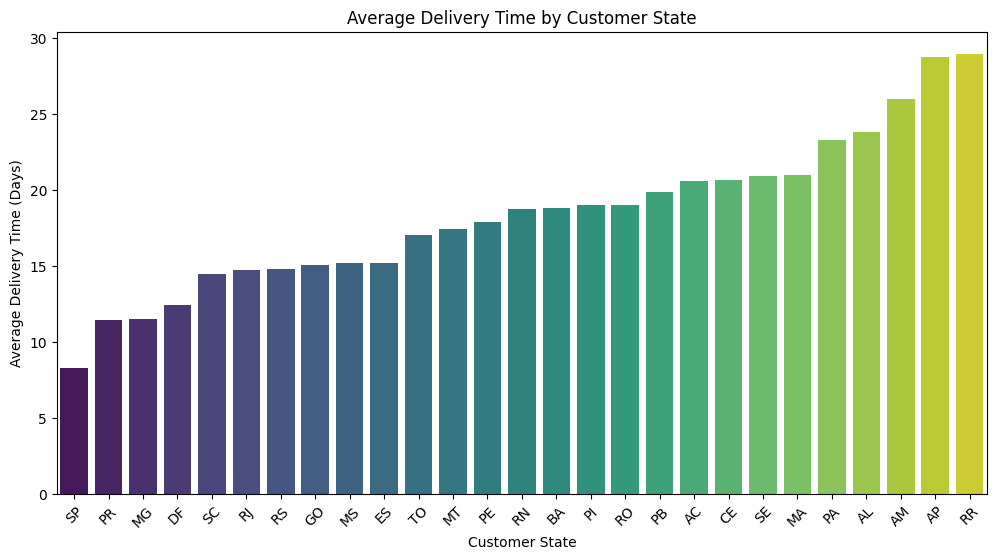

In [401]:
# Menghitung Waktu Pengiriman dalam hari
all_df['delivery_time'] = (all_df['order_delivered_customer_date'] - all_df['order_purchase_timestamp']).dt.days

# Melakukan perhitungan waktu rata-rata pengiriman dengan group by berdasarkan customer state
average_delivery_time = all_df.groupby('customer_state')['delivery_time'].mean().sort_values()

# Visualisasi
plt.figure(figsize=(12, 6))

sns.barplot(x=average_delivery_time.index,
            y=average_delivery_time.values, 
            palette='viridis', 
            hue=average_delivery_time.index, 
            legend=False)

plt.title('Average Delivery Time by Customer State')
plt.xlabel('Customer State')
plt.ylabel('Average Delivery Time (Days)')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2: 

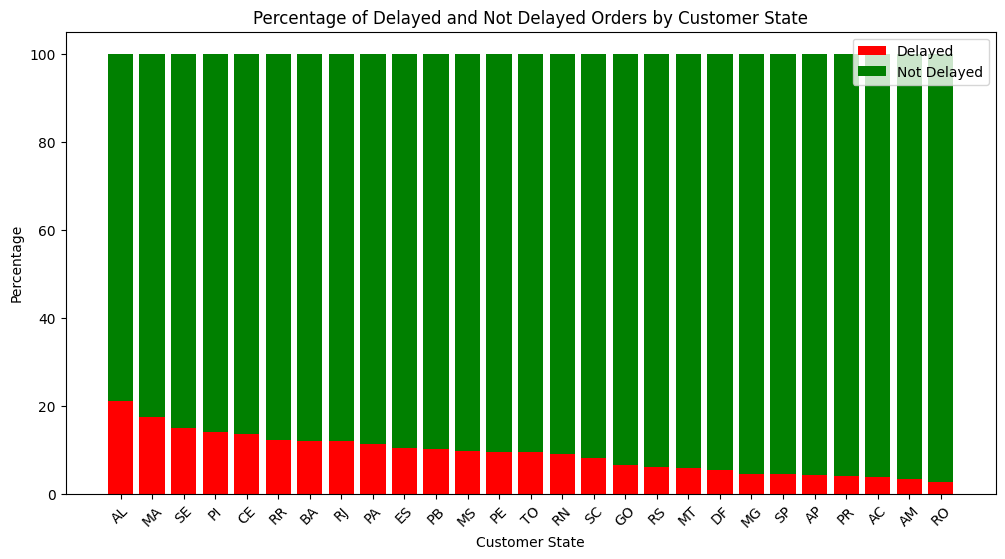

In [402]:
# Hitung waktu keterlambatan
all_df['delivery_deviation'] = (all_df['order_delivered_customer_date'] - all_df['order_estimated_delivery_date']).dt.days

# Aturan untuk menentukan keterlambatan
all_df['delayed'] = all_df['delivery_deviation'] > 0

# Hitung total pengiriman yang ada pada masing-masing customer state
total_orders_count = all_df.groupby('customer_state')['order_id'].count()

# Hitung jumlah pengiriman yang terlambat
delayed_orders_count = all_df.groupby('customer_state')['delayed'].sum()

# Hitung persentase keterlambatan pengiriman
delayed_percentage = (delayed_orders_count / total_orders_count) * 100

# Urutkan berdasarkan keterlambatan yang paling tinggi
delayed_percentage = delayed_percentage.sort_values(ascending=False)

# Hitung persentase yang tidak terlambat
not_delayed_percentage = 100 - delayed_percentage

# Visualisasi
plt.figure(figsize=(12, 6))

plt.bar(delayed_percentage.index, 
        delayed_percentage,
        color='red', 
        label='Delayed')

plt.bar(not_delayed_percentage.index, 
        not_delayed_percentage,
        bottom=delayed_percentage, 
        color='green', 
        label='Not Delayed')

plt.title('Percentage of Delayed and Not Delayed Orders by Customer State')
plt.xlabel('Customer State')
plt.ylabel('Percentage')

plt.xticks(rotation=45)
plt.legend()
plt.show()

## Conclusion

### Pertanyaan 1

Rata rata waktu pengiriman pada masing-masing customer state ada beragam. Rata-rata pengiriman tercepat berada di negara bagian SP dengan lama waktu 8 hari sedangkan rata-rata pengiriman terlama berada di negara bagian PR dengan lama waktu 29 hari.

5 Customer State dengan waktu pengiriman yang tercepat adalah:

- SP
- PR
- MG
- DF
- SC

5 Customer State dengan waktu pengiriman yang terlama adalah:

- PR
- AP
- AM
- AL
- PA

Rekomendasi bisnis yang bisa dilakukan adalah meningkatkan waktu pengiriman pada 5 customer state dengan waktu pengiriman yang terlama dengan melakukan evaluasi pada customer state tersebut dan melakukan perbaikan sistem logistik.

### Pertanyaan 2

Dari grafik bar stack tentang percentage pengiriman yang terlambat dan tidak terlambat. Dapat dilihat bahwa pada setiap customer state selalu terdapat persentase pengiriman yang terlambat. Meskipun terdapat pesentase yang terlambat, secara keseluruhan persentase keterlambatan masih di bawah 25 persen.

Customer_state dengan persentase keterlambatan tertinggi adalah AL dengan tingkat keterlambatan 21 persen sedangkan customer_state dengan persentase keterlambatan terendah adalah RO dengan tingkat keterlambatan kurang dari 5 persen.

5 Customer State dengan persentase keterlambatan terendah adalah:

- RO
- AM
- AC
- PR
- AP

5 Customer State dengan persentase keterlambatan tertinggi adalah:

- AL
- MA
- SE
- PI
- CE

Rekomendasi bisnis yang bisa dilakukan adalah mengurangi persentase keterlambatan hingga kurang dari 5% pada keseluruhan customer state dengan melakukan evaluasi dan melakukan perbaikan sistem logistik.